In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#df = pd.read_csv('Data/Pipeline_data_toy.csv', index_col=[0])
df = pd.read_csv('Data/Pipeline_data.csv', index_col=[0])

#df_missing = pd.read_csv('Data/Processed_data.csv', index_col=[0])
df_missing = pd.read_csv('Data/Processed_data_full.csv', index_col=[0])

/rds/general/user/cam119/home/anaconda3/envs/ML_project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.shape

(3801534, 40)

In [5]:
df.head()

,bmi,cigs_before_preg,birthweight_g,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,...,infections,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change
0,30.7,0.0,3657.0,1227.0,231.0,31.0,30.0,66.0,8.0,0.0,...,0.0,0.0,0.0,2.0,3.0,1.0,2.0,0.0,1.0,41.0
1,33.3,2.0,3242.0,1704.0,185.0,35.0,35.0,63.0,9.0,0.0,...,0.0,0.0,1.0,1.0,3.0,4.0,2.0,1.0,0.0,-3.0
2,30.0,0.0,3470.0,336.0,273.0,31.0,28.0,71.0,17.0,0.0,...,0.0,0.0,1.0,4.0,5.0,1.0,1.0,0.0,1.0,58.0
3,23.7,0.0,3140.0,938.0,138.0,26.0,23.0,64.0,6.0,0.0,...,0.0,0.0,0.0,1.0,5.0,1.0,2.0,0.0,0.0,0.0
4,35.5,0.0,2125.0,830.0,219.0,35.0,37.0,66.0,15.0,0.0,...,0.0,0.0,0.0,1.0,5.0,3.0,1.0,0.0,1.0,-1.0


In [6]:
df.describe()

,bmi,cigs_before_preg,birthweight_g,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,...,infections,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.205015,1.159307,3268.762025,1218.21940,188.799936,31.475466,29.01810,64.138261,11.362057,0.02036,...,0.026800,0.015000,0.309200,1.703600,2.894200,1.794600,1.332900,0.153300,0.515800,29.408369
std,6.794697,5.019491,588.461544,626.39526,41.889812,6.691271,5.77615,2.779817,4.043179,0.24268,...,0.161507,0.121559,0.462187,0.718609,1.505667,1.159718,0.531701,0.360294,0.499775,15.810185
min,9.641903,-0.297575,277.000000,0.00000,100.000000,15.000000,13.00000,48.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-46.000000
25%,22.300000,0.000000,2977.000000,758.00000,160.000000,27.000000,25.00000,62.000000,10.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,20.000000
50%,25.700000,0.000000,3310.000000,1230.00000,181.000000,31.000000,29.00000,64.000000,11.927388,0.00000,...,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,29.000000
75%,30.700000,0.000000,3630.000000,1723.00000,210.000000,36.000000,33.00000,66.000000,13.000000,0.00000,...,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.000000,1.000000,38.000000
max,66.400000,98.000000,6150.000000,2359.00000,400.000000,76.000000,50.00000,78.000000,49.000000,10.00000,...,1.000000,1.000000,1.000000,4.000000,10.000000,6.000000,4.000000,1.000000,1.000000,164.074740


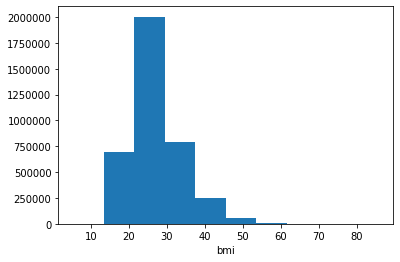

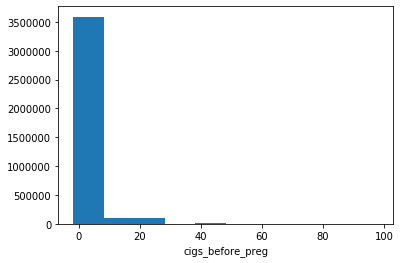

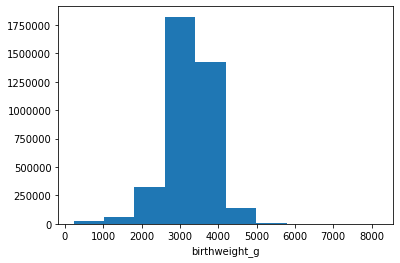

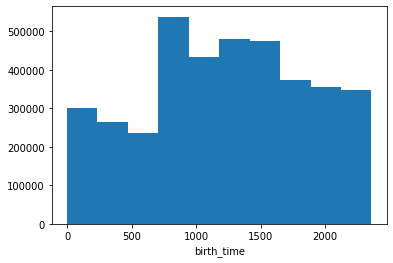

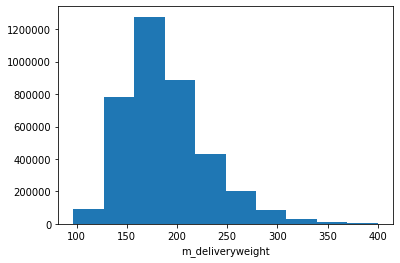

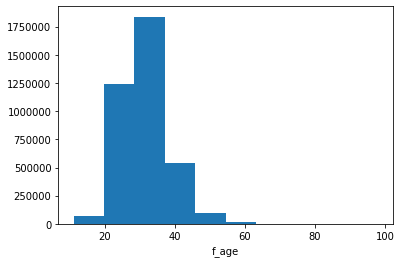

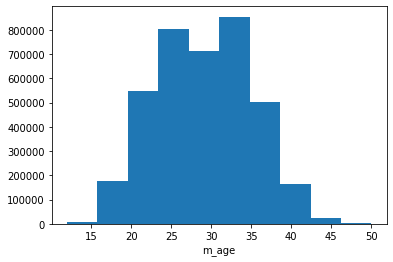

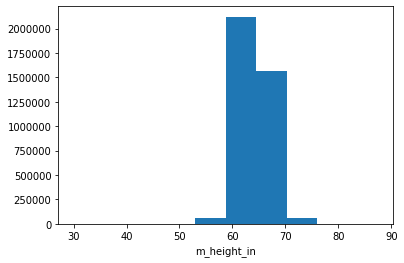

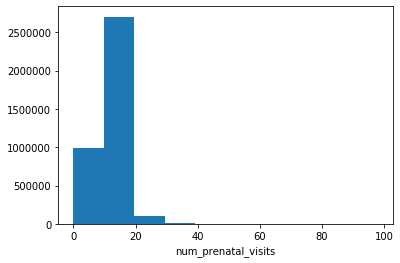

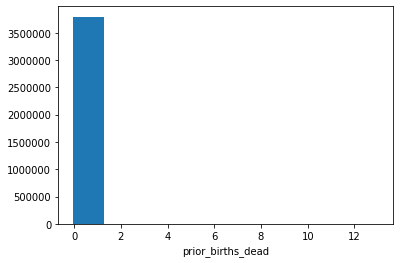

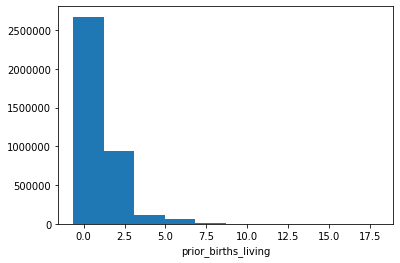

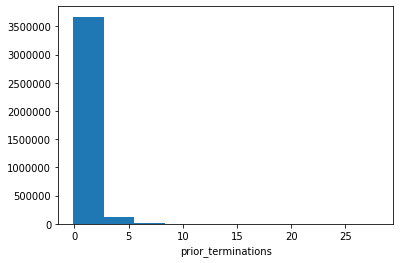

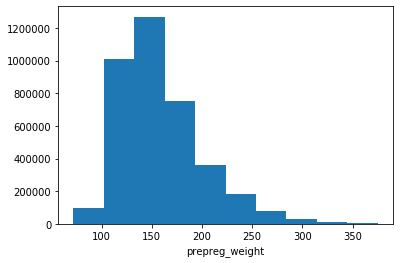

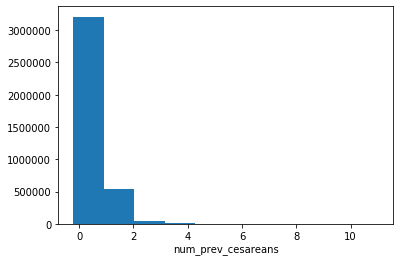

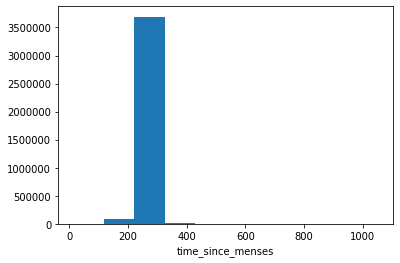

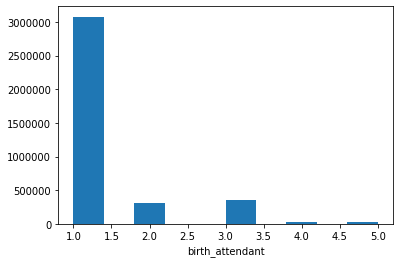

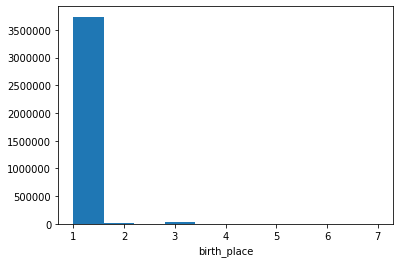

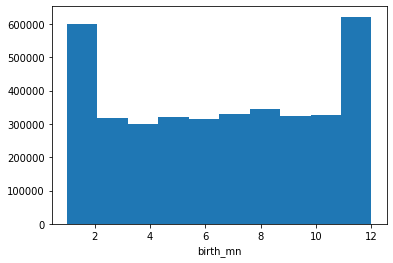

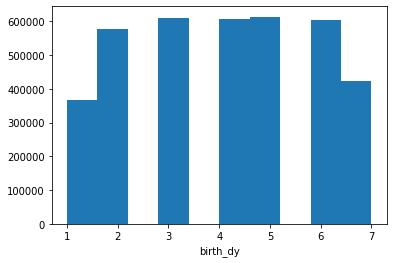

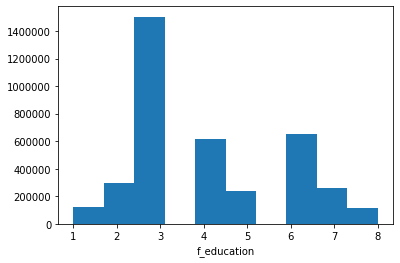

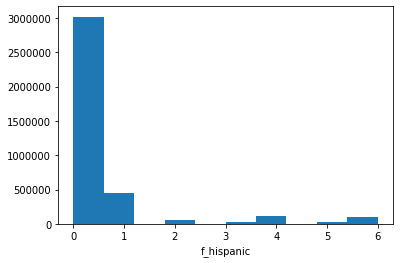

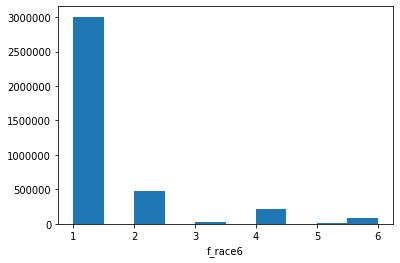

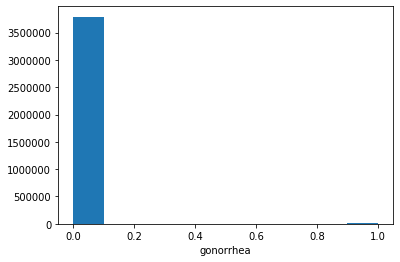

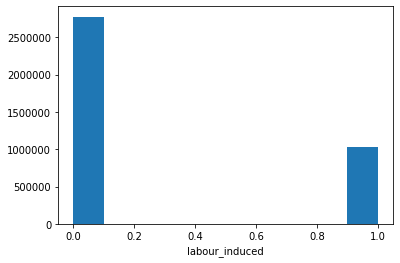

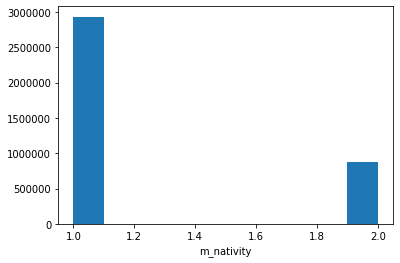

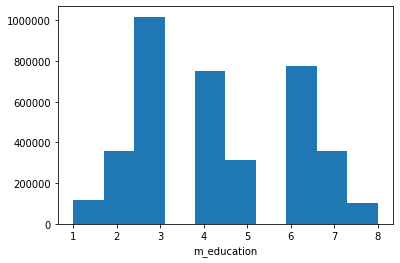

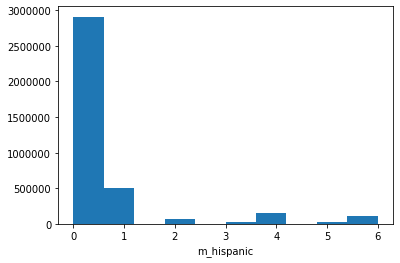

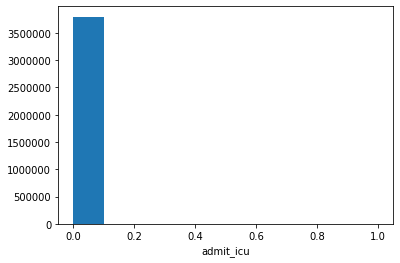

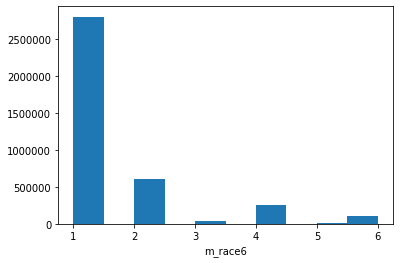

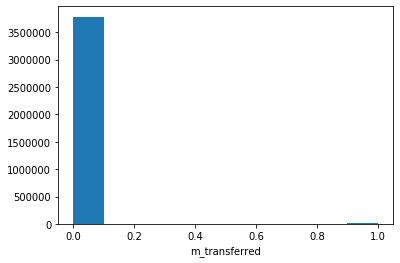

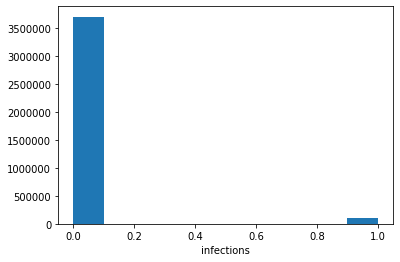

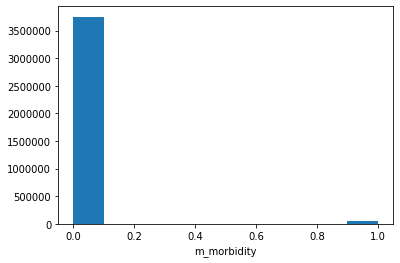

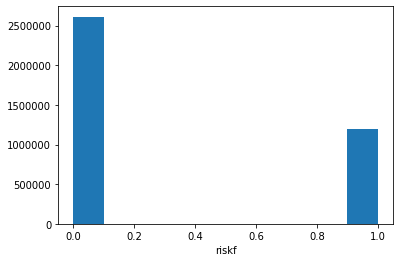

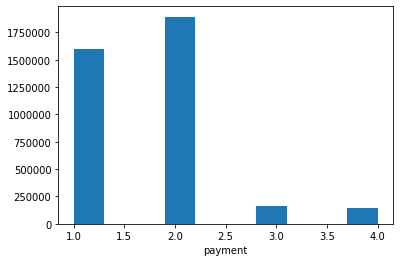

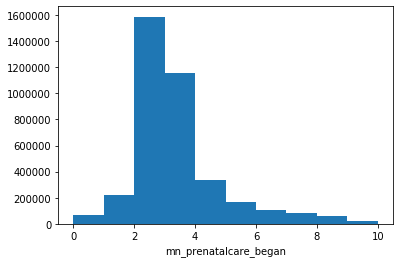

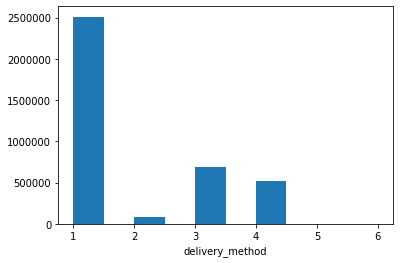

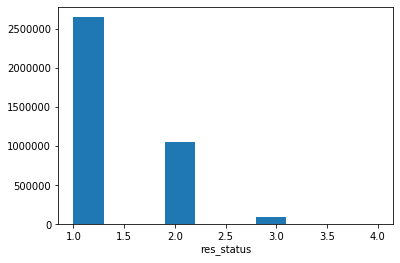

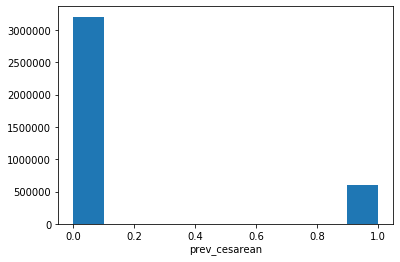

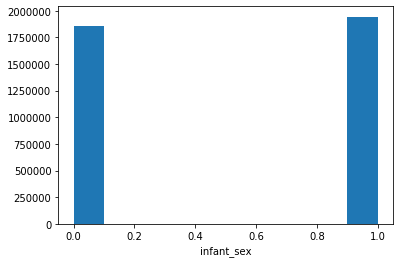

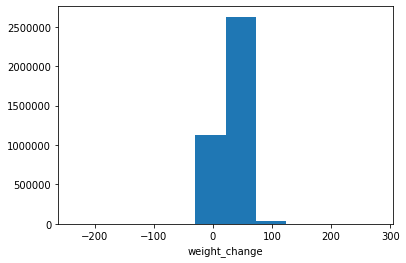

In [7]:
#df.hist(figsize = (50,50))
#plt.show()

columns = list(df.columns)

for i in columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

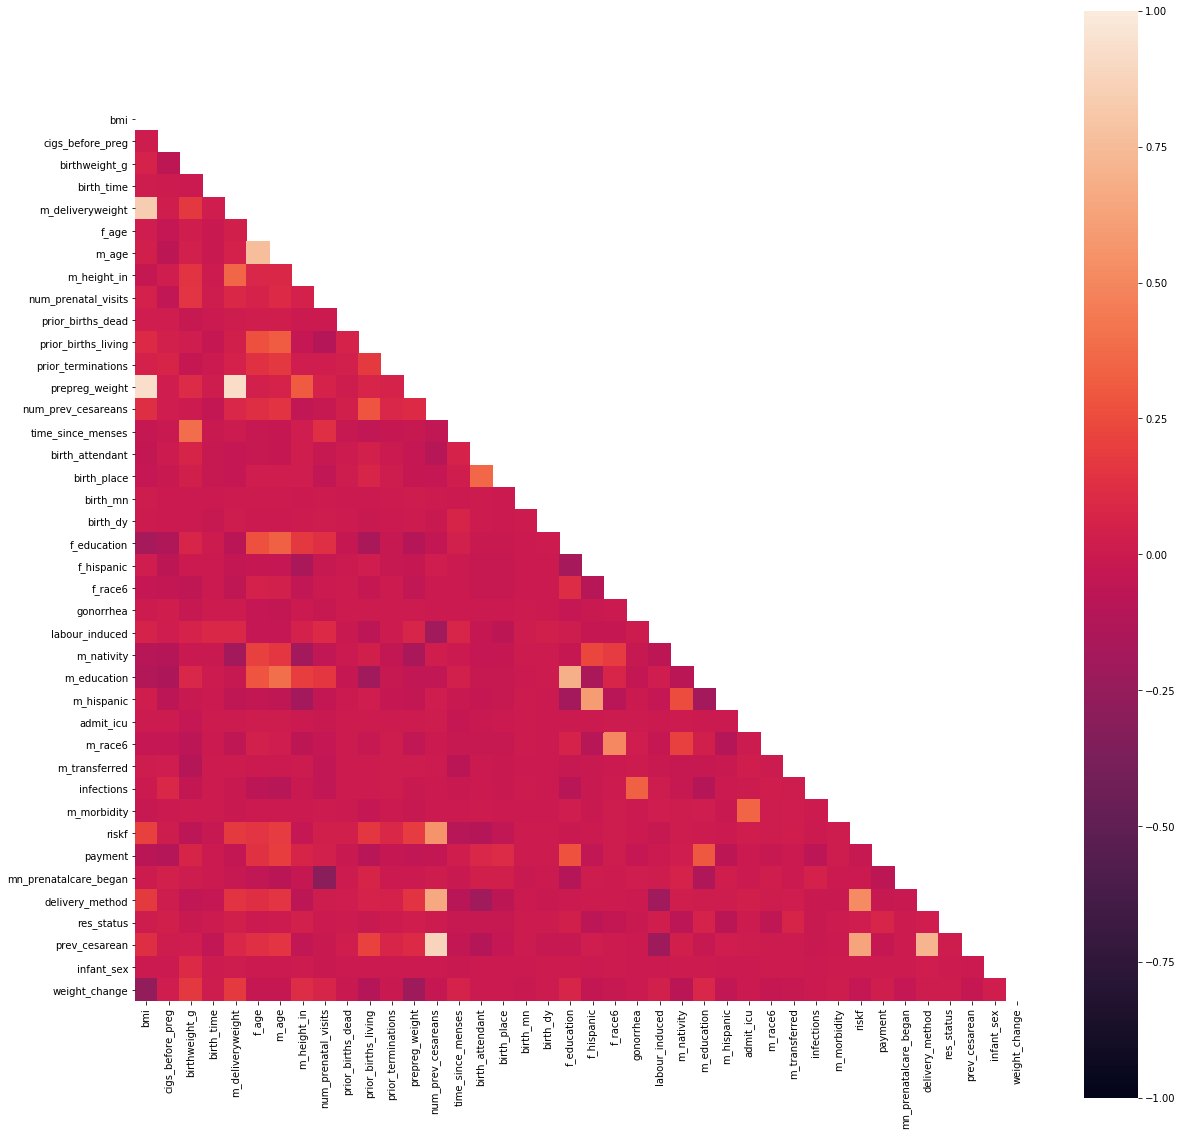

In [8]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask=mask, square=True, vmin=-1, vmax=1)
plt.show()

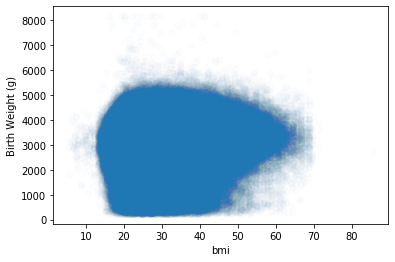

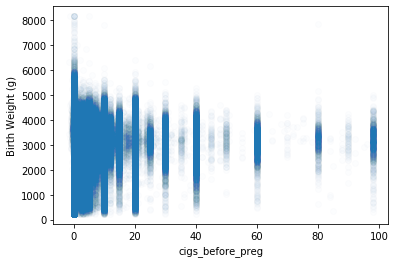

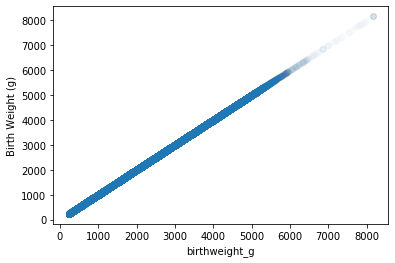

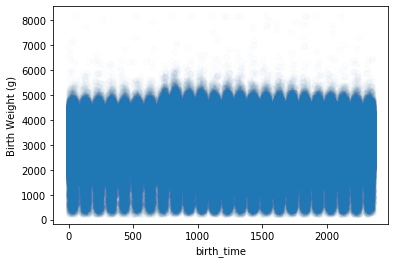

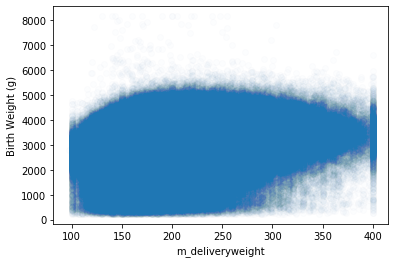

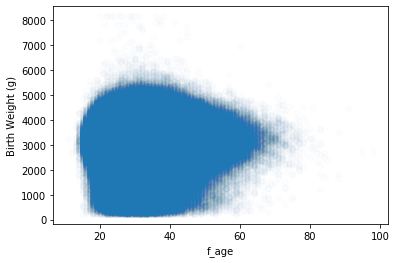

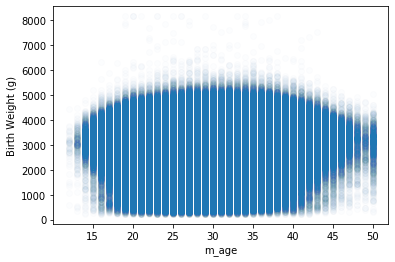

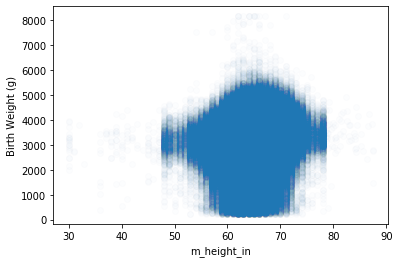

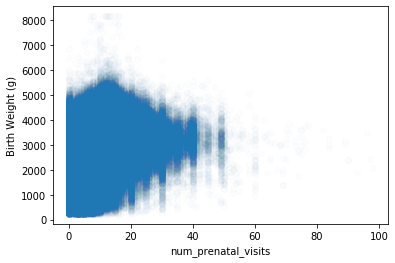

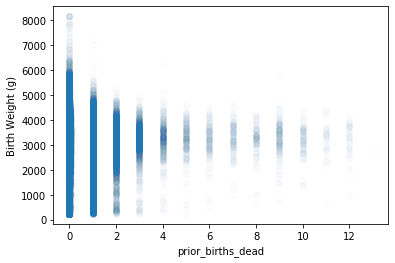

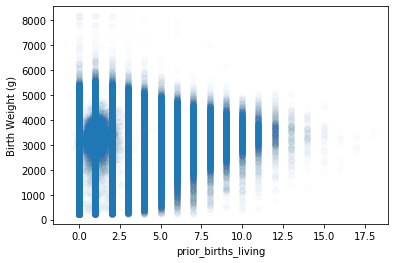

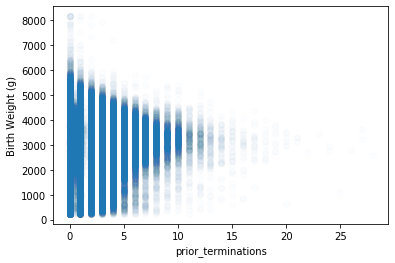

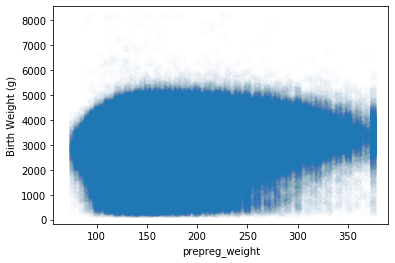

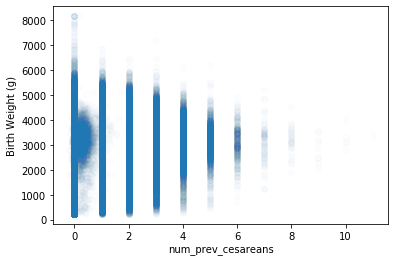

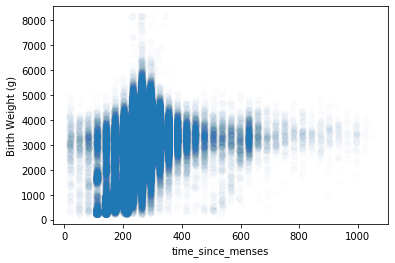

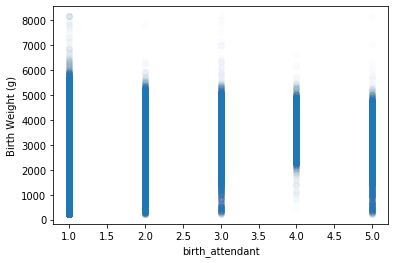

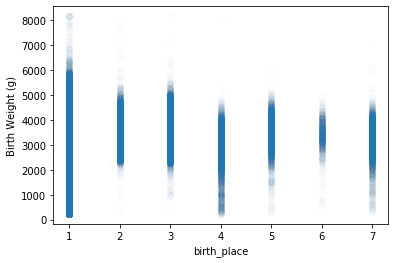

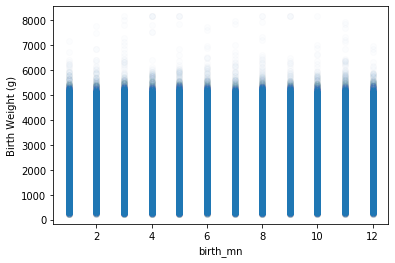

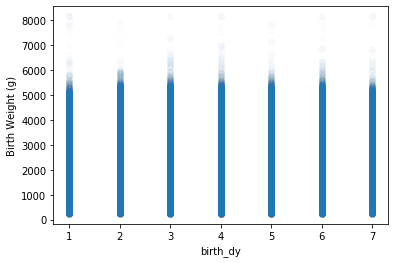

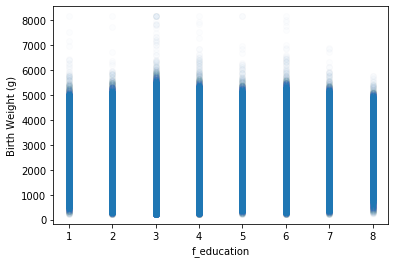

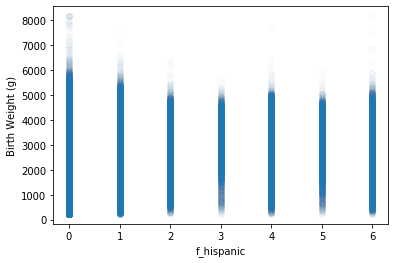

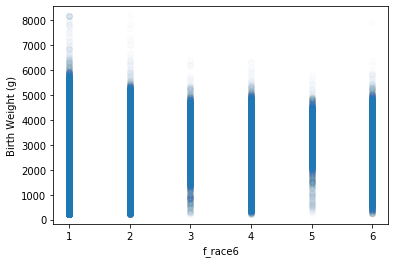

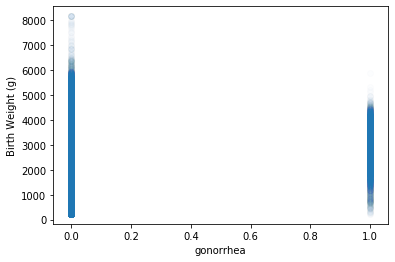

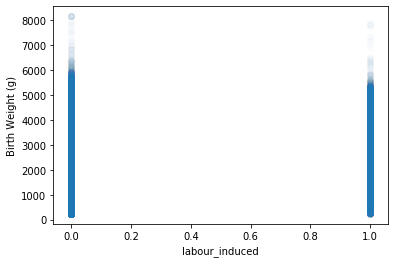

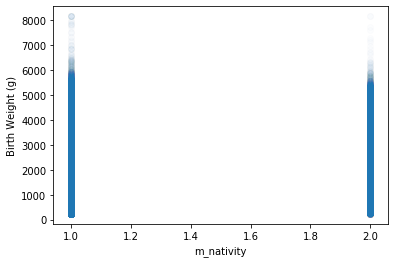

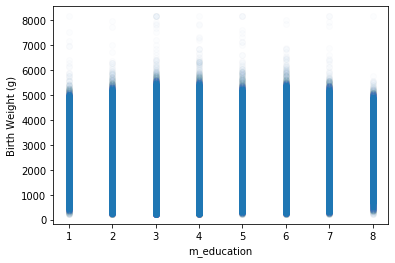

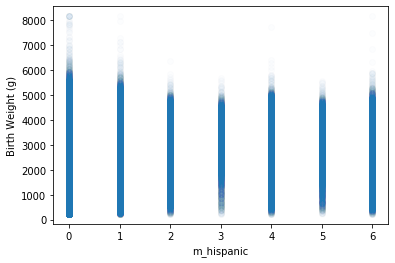

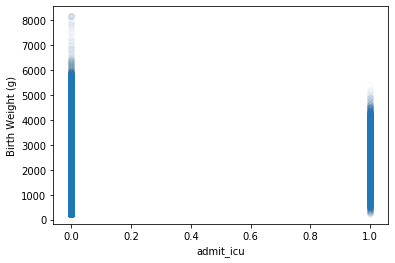

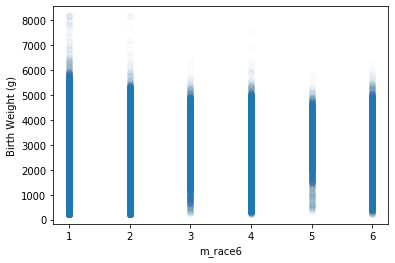

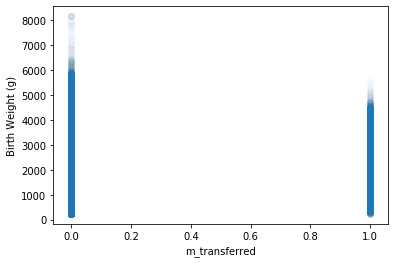

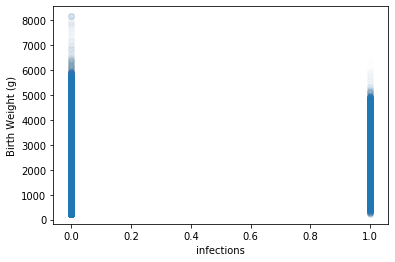

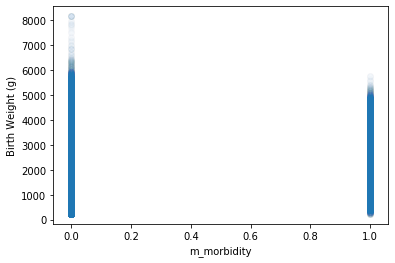

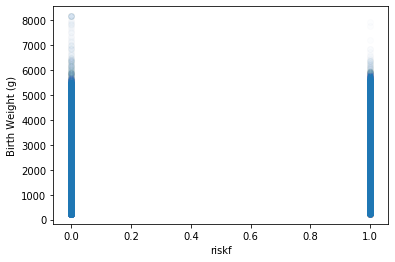

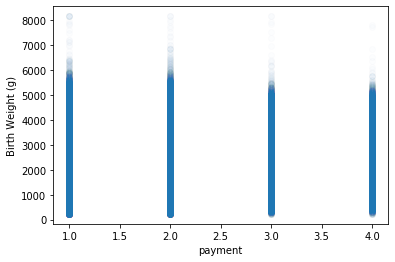

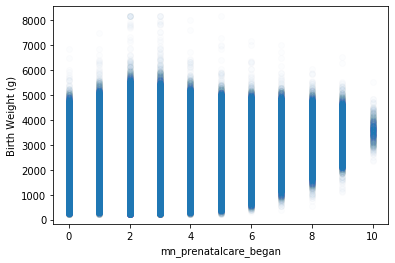

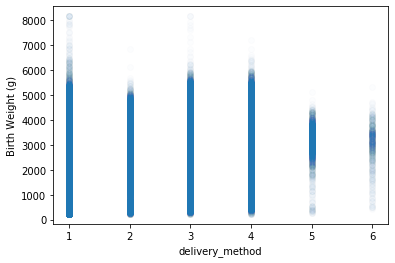

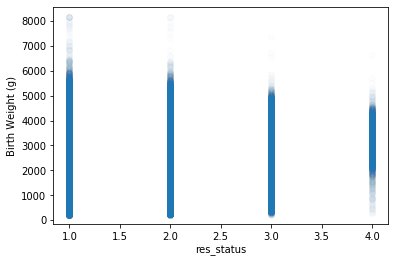

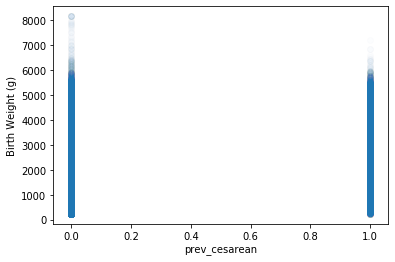

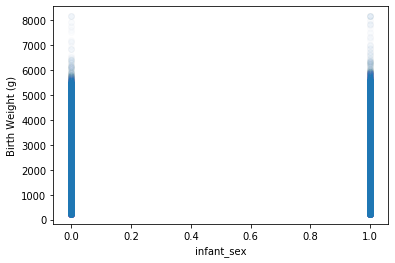

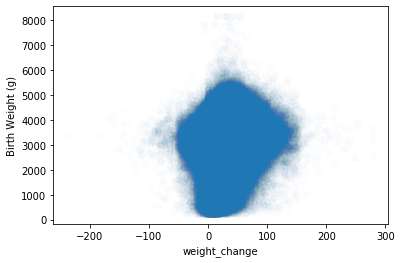

In [9]:
columns = list(df.columns)

for i in columns:
    plt.scatter(df[i], df['birthweight_g'], alpha=0.01)
    plt.xlabel(i)
    plt.ylabel("Birth Weight (g)")
    plt.show()

#### Looking at birthweight

In [10]:
print('{:.2f}% of infants born in US in 2018 were LBW infants'.\
      format(1e2*len(df[df['birthweight_g'] < 2500])/len(df)))

8.29% of infants born in US in 2018 were LBW infants


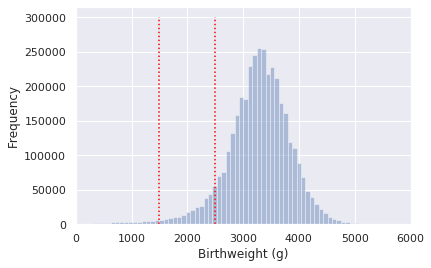

In [6]:
sns.distplot(df['birthweight_g'], bins=10**2, kde=False)
plt.xlim(0, 6*10**3)
plt.vlines(2500, 0, 3*10**5, colors='red', linestyles='dotted', label='Low BW')
plt.vlines(1500, 0, 3*10**5, colors='red', linestyles='dotted', label='Very Low BW')
plt.xlabel('Birthweight (g)')
plt.ylabel('Frequency')
#plt.show()
plt.savefig('Results/Birthweight_histogram.pdf', bbox_inches="tight")

#### Compare distributions before and after imputation

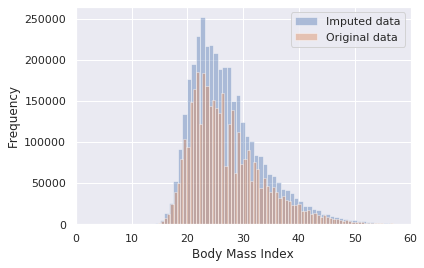

In [4]:
sns.distplot(df['bmi'], label='Imputed data', bins=10**2, kde=False)
sns.distplot(df_missing['bmi'], label='Original data', bins=10**2, kde=False)
plt.legend(loc='upper right')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.xlim(0, 60)
#plt.show()
plt.savefig('Results/BMI_distribution_freq.pdf', bbox_inches="tight")

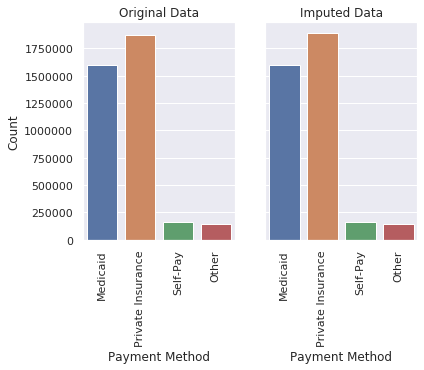

In [56]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)
ax1 = sns.countplot(df_missing['payment'], ax=ax[0])
ax2 = sns.countplot(df['payment'], ax=ax[1])
ax1.set_xticklabels(["Medicaid","Private Insurance", "Self-Pay", "Other"], rotation=90)
ax2.set_xticklabels(["Medicaid","Private Insurance", "Self-Pay", "Other"], rotation=90)
#Labels
ax1.set_title('Original Data')
ax2.set_title('Imputed Data')
ax1.set_xlabel('Payment Method')
ax2.set_xlabel('Payment Method')
ax1.set_ylabel('Count')
ax2.set_ylabel('')

#fig.show()
plt.savefig('Results/Payment_distribution.pdf', bbox_inches="tight")

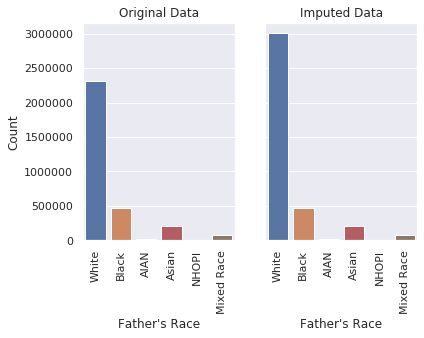

In [57]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)
ax1 = sns.countplot(df_missing['f_race6'], ax=ax[0])
ax2 = sns.countplot(df['f_race6'], ax=ax[1])
ax1.set_xticklabels(["White","Black", "AIAN", "Asian", "NHOPI", "Mixed Race"], rotation=90)
ax2.set_xticklabels(["White","Black", "AIAN", "Asian", "NHOPI", "Mixed Race"], rotation=90)
#Labels
ax1.set_title('Original Data')
ax2.set_title('Imputed Data')
ax1.set_xlabel("Father's Race")
ax2.set_xlabel("Father's Race")
ax1.set_ylabel('Count')
ax2.set_ylabel('')

#fig.show()
plt.savefig('Results/FRace_distribution.pdf', bbox_inches="tight")

#### Visualisation of PCA

In [21]:
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

In [22]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled.head()

In [ ]:
pca = PCA(n_components=5)
X_new = pca.fit_transform(X_scaled)

* Biplot

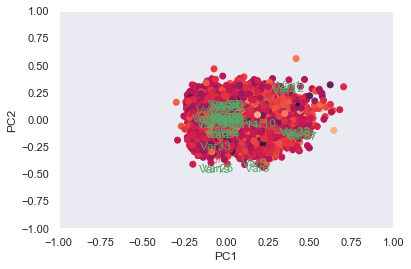

In [25]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [32]:
n = len(X_scaled.columns)-1 # set the number
pca = PCA(n_components = n)
X_pca = pca.fit(X_scaled).transform(X_scaled)
 
df_pca = pd.DataFrame(X_pca)
df_pca['y'] = pd.DataFrame(y)
#df_pca.columns = [['pc1', 'pc2', 'pc3', 'pc3', 'y']]
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,y
0,2.398135,3.168469,-3.261502,0.552672,-0.591350,-1.694360,0.165081,-0.501665,0.620782,-0.482589,...,0.415196,-0.090956,1.123928,0.579390,0.576636,-0.054385,0.077506,0.087583,0.031682,2183.0
1,-1.612472,3.556987,1.132401,-2.846855,1.378724,0.653976,0.109201,-0.624084,0.947425,3.027189,...,-0.346016,-0.145956,-0.063268,-0.000803,0.269167,0.514154,-0.062883,-0.033593,0.025934,3280.0
2,-1.951276,0.271763,0.631708,-0.607807,-0.868424,-0.721272,-0.060699,0.386140,0.158861,-0.519117,...,-0.246926,0.778835,0.202125,0.465807,0.508929,-0.122774,0.083068,-0.005615,-0.023158,2410.0
3,1.037274,-1.573734,2.037911,-1.668255,1.425215,-0.392619,-0.494796,1.488162,1.139329,-1.626797,...,-0.625697,-2.994453,-0.174116,0.791604,0.305383,1.457630,-0.343777,-0.778012,-0.036703,3544.0
4,-0.098503,1.296523,-1.129127,0.583229,0.961861,-0.318870,-0.414961,-1.007815,-0.427312,-0.492394,...,0.017635,0.854985,-0.426020,-0.338833,0.525084,-0.770657,-0.448225,-0.100897,0.035459,2778.0


In [35]:
### Biplot

# Scatter plot based and assigne color based on 'label - y'
sns.lmplot(df_pca[1], df_pca[2], data=df_pca, fit_reg = False, hue = 'y', size = 15, scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[1]
 
# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(X)[:,0]
ys = pca.transform(X)[:,1]
 
## visualize projections
 
## Note: scale values for arrows and text are a bit inelegant as of now, so feel free to play around with them
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df.columns.values)[i], color='r')
 
for i in range(len(xs)):
    plt.text(xs[i]*1.08, ys[i]*1.08, list(X.index)[i], color='b') # index number of each observations
plt.title('PCA Plot of first PCs')

C:\Users\catri\Anaconda\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [26]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), 
                     color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], 
                     color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))
plt.show()

TypeError: 'PCA' object is not subscriptable